In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install pycaret

     |████████████████████████████████| 261 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 39.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 51.4 MB/s eta 0:00:01
     |████████████████████████████████| 370 kB 44.0 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.7 MB 47.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 28.3 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=fa61ebc216bdf7e15f343b1c2c872a5b68f3d6a373416575ba82

In [4]:
import pycaret

Kiva Microfunds is a non-profit that allows individuals to lend money to low-income entrepreneurs and students around the world. Since starting in 2005, Kiva has crowd-funded millions of loans with a repayment rate of around 98%. At Kiva, each loan request includes both traditional demographic information on the borrower, such as gender and location, as well as a personal story. We will use the text given in personal story to gain insights of the dataset and understand hidden semantic structure in the text. The dataset contains 6,818 samples.

In [5]:
from pycaret.datasets import get_data
df = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [6]:
#checks shape of the data
df.shape

(6818, 7)

In [7]:
# sampling the data to select only 1000 documents
df = df.sample(1000, random_state=786).reset_index(drop=True)
df.shape

(1000, 7)

**Custom Stopwords**: Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using custom_stopwords parameter

**What is Topic Model?** 
In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is. 

In [27]:
# en = personal story of the borrower
from pycaret.nlp import *
exp_nlp101 = setup(data = df, target = 'en',custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],log_experiment = True, experiment_name ='KivaNLP1', session_id = 123)

Description,Value
session_id,123
Documents,1000
Vocab Size,4628
Custom Stopwords,True


In [28]:
 # creates Latent Dirichlet Allocation (LDA) model:
lda = create_model('lda')

In [29]:
print(lda)

LdaModel(num_terms=4628, num_topics=4, decay=0.5, chunksize=100)


In [11]:
#uses all cores to speed up training
lda2 = create_model('lda', num_topics = 6, multi_core = True)

In [12]:
print(lda2)

LdaModel(num_terms=4593, num_topics=6, decay=0.5, chunksize=100)


In [13]:
# assigns Topic proportions to dataset
lda_results = assign_model(lda)
lda_results.head()

	

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.881271,0.115136,0.002586,0.001007,Topic 0,0.88
1,Kenya,gynaecology practitioner run year old life wif...,M,1200,partner,Health,0,0.062156,0.934383,0.002490,0.000972,Topic 1,0.93
2,Dominican Republic,live child boy girl range year old sell new us...,F,150,partner,Clothing,0,0.377637,0.377701,0.243474,0.001189,Topic 1,0.38
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.810663,0.184903,0.003190,0.001244,Topic 0,0.81
4,Kenya,year old hotel last year get good return compe...,F,300,lender,Food,1,0.797161,0.147853,0.053918,0.001069,Topic 0,0.80


Notice how 6 additional columns are now added to the dataframe. en is the text after all pre-processing. Topic_0 ... Topic_3 are the topic proportions and represents the distribution of topics for each document. Dominant_Topic is the topic number with highest proportion and Perc_Dominant_Topic is the percentage of dominant topic over 1 (only shown when models are stochastic i.e. sum of all proportions equal to 1) .

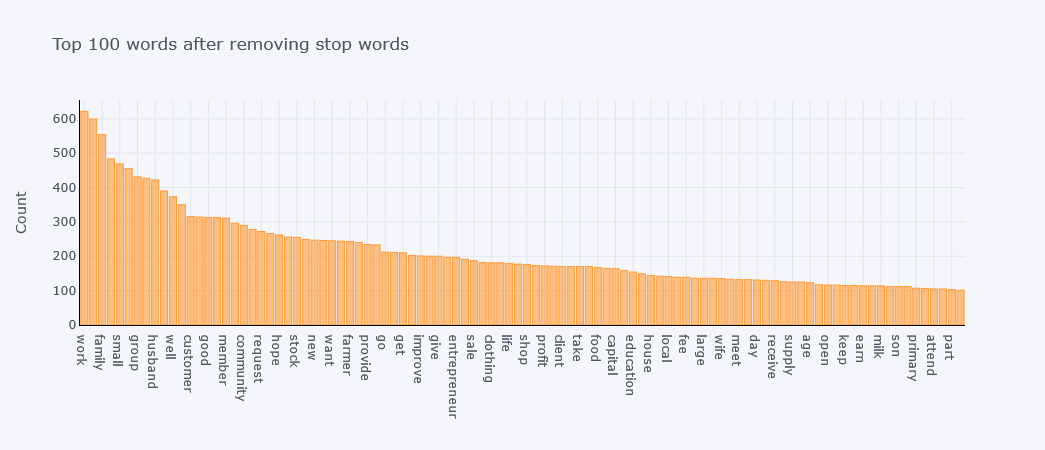

In [31]:
plot_model()

**Bigram Extraction**: A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York"

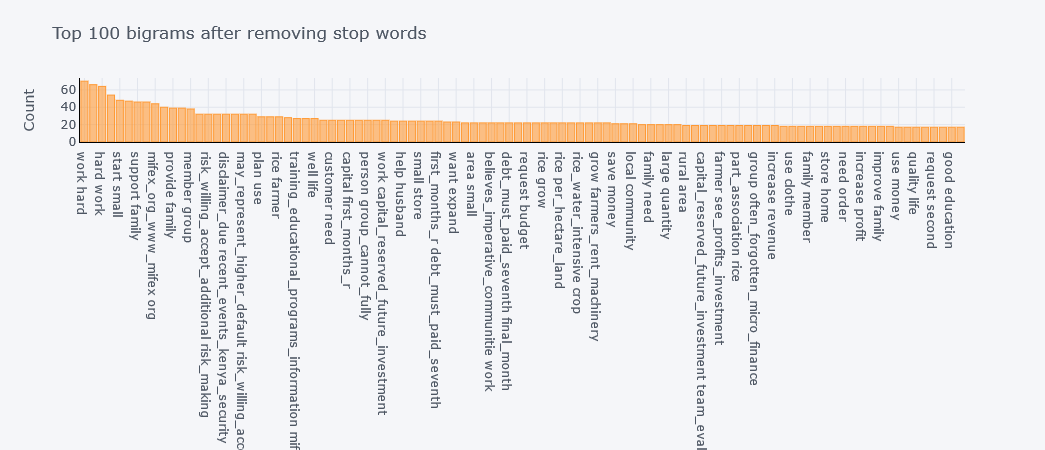

In [32]:
plot_model(plot = 'bigram')

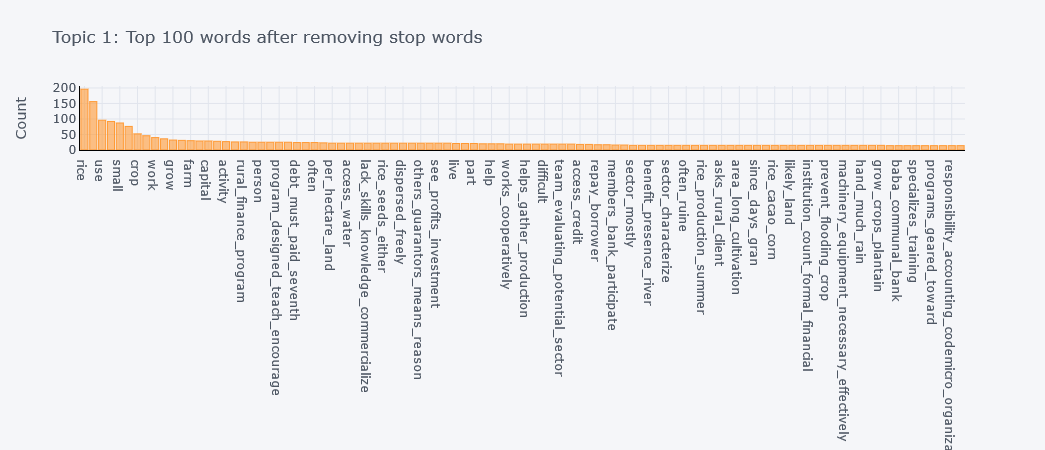

In [33]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

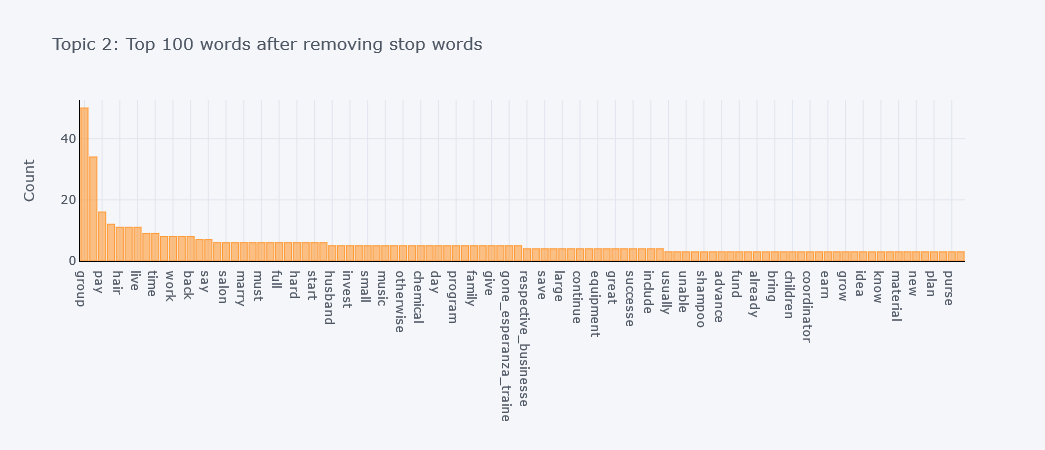

In [34]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 2')

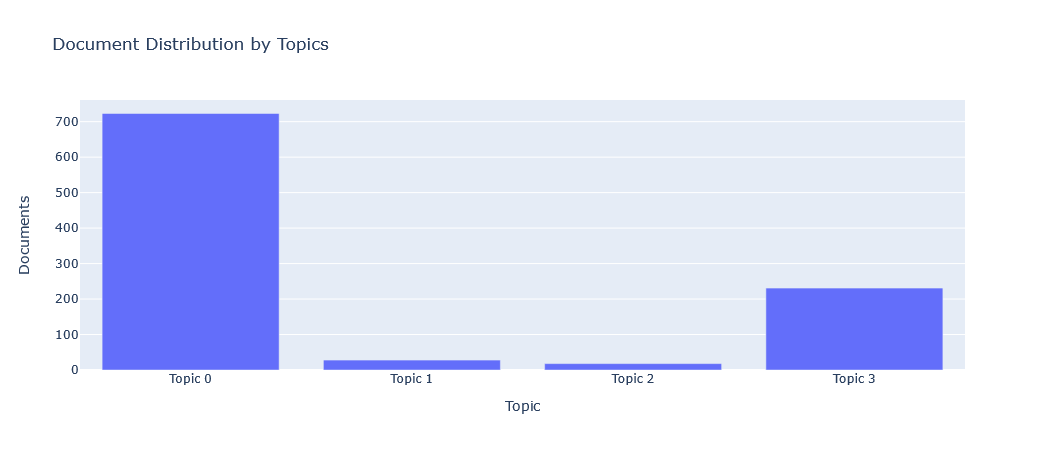

In [35]:
plot_model(lda, plot = 'topic_distribution')

Each document is a distribution of topics and not a single topic. Although, if the task is of categorizing document into specific topics, it wouldn't be wrong to use the topic proportion with highest value to categorize the document into a topic. In above plot, each document is categorized into one topic using the largest proportion of topic weights. We can see most of the documents are in Topic 3 with only few in Topic 1. If you hover over these bars, you will get basic idea of themes in this topic by looking at the keywords. For example if you evaluate Topic 2, you will see keywords words like 'farmer', 'rice', 'land', which probably means that the loan applicants in this category pertains to agricultural/farming loans. However, if you hover over Topic 0 and Topic 3 you will observe lot of repitions and keywords are overlapping in all topics such as word "loan" and "business" appears both in Topic 0 and Topic 3.

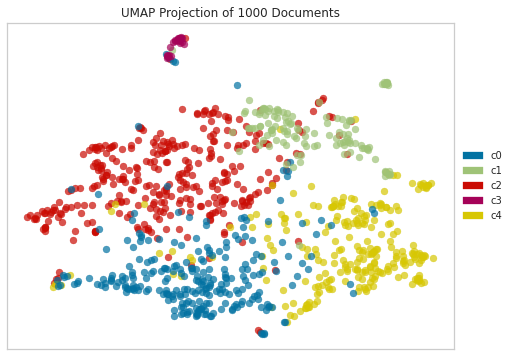

In [36]:
plot_model(lda, plot = 'umap')

UMAP (Uniform Manifold Approximation and Projection) is a novel manifold learning technique for dimensionality reduction. It is similar to tSNE and PCA in its purpose as all of them are techniques to reduce dimensionality for 2d/3d projections. 

In [37]:
#Interactive feature to evauluate the model
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

IntProgress(value=0, description='Processing: ', max=25)

Output()

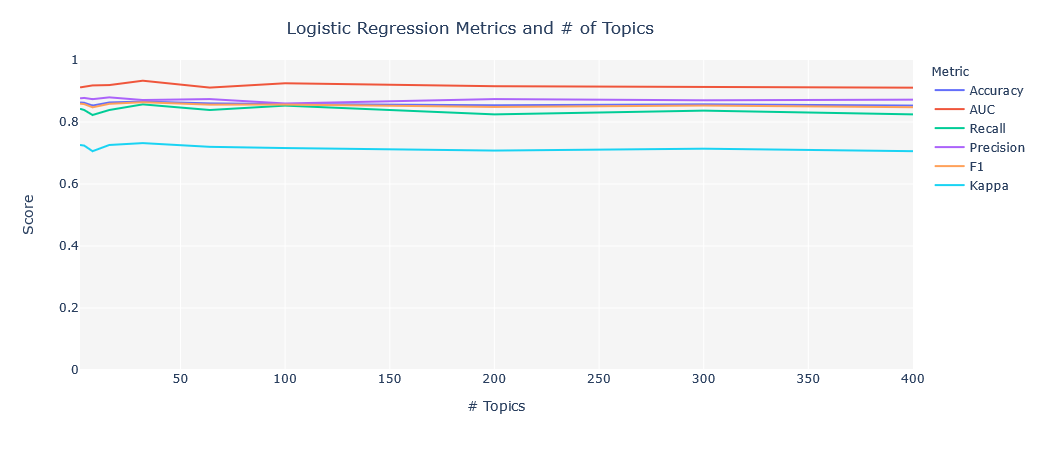

Best Model: Latent Dirichlet Allocation | # Topics: 32 | Accuracy : 0.866


In [38]:
#Hyperparameter tuning for Accuracy based classification of Loan or No Loan in 'status' column
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'status')

87% Accuracy Hurray!!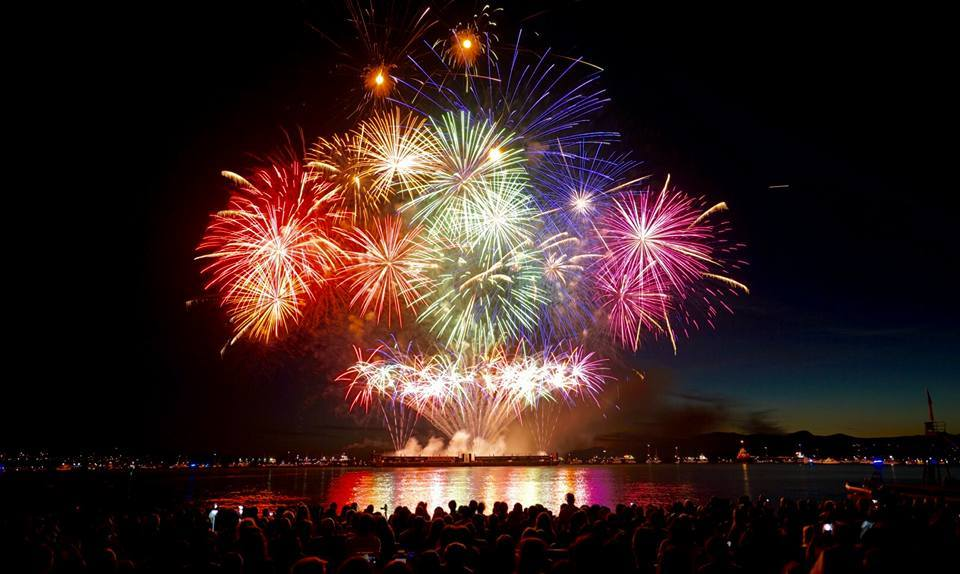

In [39]:
save_model(lda,'KivaNLP2 19Apr2021')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7f871c3410d0>, 'KivaNLP2 19Apr2021.pkl')